# Regression Coefficientes

In [1]:
# Import modules
import pandas as pd, seaborn as sns, numpy as np, matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import math

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

## With Table 

In [5]:
data1 = pd.read_stata("https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/METable.dta")
data1.head()

for i in ['refer', 'med_class_any_6', 'med_class_any_16']:
    label_encoder.fit(data1[i])
    data1[i] = label_encoder.transform(data1[i])
    data1[i] = np.where(data1[i] == 2, np.nan, data1[i])

data1.head()

,study,facilitycode,case,as_correct,as_h1,as_h2,as_h6,as_h7,as_h8,as_h12,...,kenya_fac_qual_code_2,kenya_fac_qual_code_3,price_kenya,facility_private,checklist_essential,sp_roster_age,sp_roster_bmi,sp_roster_bp,sp_roster_bp_sys,sp_roster_male
0,Kenya,9052302,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,230.0,Private,0.500,31,32.038578,130/80,130,Female
1,Kenya,9012207,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,350.0,Private,0.625,31,32.038578,130/80,130,Female
2,Kenya,9052301,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,400.0,Private,0.125,31,32.038578,130/80,130,Female
3,Kenya,9022203,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,250.0,Private,0.125,31,32.038578,130/80,130,Female
4,Kenya,9012206,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,300.0,Private,0.125,31,32.038578,130/80,130,Female


In [16]:
# plt.figure(figsize=(8, 12))
y = ["as_correct", "ch_correct", "cp_correct", "tb_correct"
     , "refer"
     , "med_any"
     ,"med_class_any_6", "med_class_any_16"
    ]
y_label_t = [
    "Asthma: Inhaler/Bronchodilator"
    , "Child Diarrhea: ORS"
    , "Chest Pain: Referencial/Aspirin/ECG"
    , "Tuberculosis: AFB Smear"
    , "Referred (non-diarrhea)"
    , "Any Medication"
    , "Antibiotics"
    , "Steroids"
]

fmla = " ~ facility_private + C(case_code)"
fmla1 = " ~ facility_private"

coef = []
lower = []
upper = []
p_v = []
varname = []


for i in y:
    try:
        # mdl = smf.glm(i + fmla, data = data1).fit()
        mdl = smf.logit(i + fmla, data = data1).fit()
    except:
        mdl = smf.logit(i + fmla1, data = data1).fit()
        # mdl = smf.glm(i + fmla1, data = data1).fit()
        print(i + fmla1)
        
    coef_data = pd.DataFrame(mdl.summary().tables[1].data)
    coef_val = np.float_(np.array(coef_data.iloc[2, [1, 4, 5, 6]]))
    
    coef.append(coef_val[0])
    p_v.append(coef_val[1])
    lower.append(coef_val[2])
    upper.append(coef_val[3])
    varname.append(i)
                                  
        
df0 = pd.DataFrame(
    {
        "coef": coef,
        "p_value": p_v,
        "l": lower,
        "u": upper,
        "var": varname,
    }
)
df1 = pd.melt(df0,id_vars=['var', 'coef', "p_value"], var_name='range', value_name='range_val').round(3)


OR = df0.coef.map(math.exp)
new_or = []
for i in OR:
    vl = str(round(i, 2))
    new_or.append(vl)

Optimization terminated successfully.
         Current function value: 0.486007
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.486007
         Iterations 5
as_correct ~ facility_private
Optimization terminated successfully.
         Current function value: 0.574092
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574092
         Iterations 5
ch_correct ~ facility_private
Optimization terminated successfully.
         Current function value: 0.308251
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.308251
         Iterations 7
cp_correct ~ facility_private
Optimization terminated successfully.
         Current function value: 0.607698
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607698
         Iterations 5
tb_correct ~ facility_private
         Current function value: 0.155485
         Iterations: 3

c:\python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\Jhon\AppData\Local\Temp\ipykernel_4852\2422325725.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_label_t[::-1])


[Text(0, 0, 'Steroids'),
 Text(0, 1, 'Antibiotics'),
 Text(0, 2, 'Any Medication'),
 Text(0, 3, 'Referred (non-diarrhea)'),
 Text(0, 4, 'Tuberculosis: AFB Smear'),
 Text(0, 5, 'Chest Pain: Referencial/Aspirin/ECG'),
 Text(0, 6, 'Child Diarrhea: ORS'),
 Text(0, 7, 'Asthma: Inhaler/Bronchodilator')]

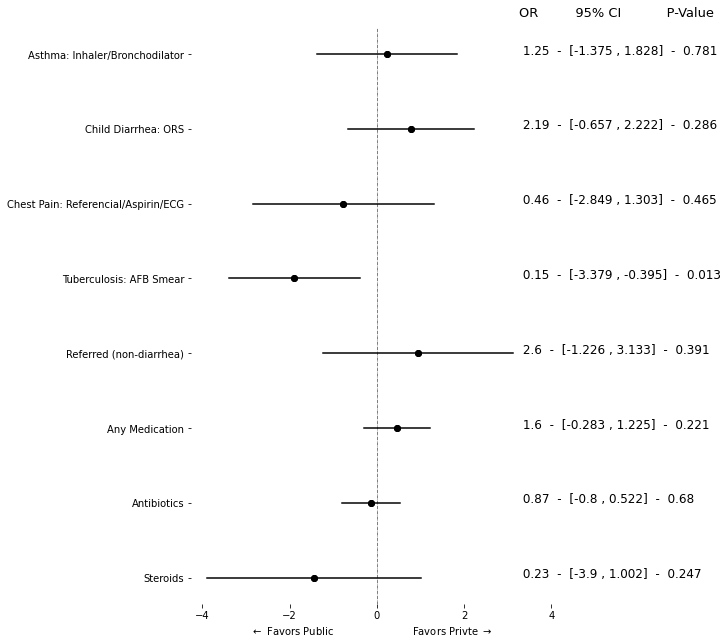

In [17]:
### Plots    

OR = df0.coef.map(math.exp)
new_or = []
for i in OR:
    new_vl = round(float(i), 2)
    new_or.append(new_vl)
    
df0["OR"] = new_or
table_reg = (" " + df0["OR"].map(str) + "  -  " +  "[" + df0.l.map(str) + " , " + df0.u.map(str) + "]" + "  -  " + df0.p_value.map(str))[::-1]

fig = plt.figure(figsize = (5, 8))
ax = fig.add_axes([.1, 1, 1, 1])

for i in y[::-1]:
    ref_data = df1[df1["var"] == i]
    ax.plot("range_val", "var", data = ref_data, color = "black")
    ax.scatter("coef", "var", data = ref_data, color = "black")
    
    
omit_all = ['left', 'right', 'top', 'bottom']

ax.spines[omit_all].set_visible(False)

ax.axvline(0, linestyle = "-.", lw = .5, color = "black")

for i in range(8):
    lbl = table_reg.iloc[i]
    ax.text(3.25, i, lbl, size=12)

ax.text(3.25, 7.5, "OR         95% CI           P-Value", size = 13)

ax.set_xticks(np.arange(-4, 4.1, 2))
ax.set_xlabel(r"$\leftarrow$ Favors Public                         Favors Privte $\rightarrow$")
ax.set_yticklabels(y_label_t[::-1])

## With Tables of Two Datasets

In [18]:
# Import data
data21 = pd.read_stata("https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/METable2data.dta")
data22 = pd.read_stata("https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/METable2data2.dta")
data21['case_3'] = np.where(data21['case'] == 3, True, False)

C:\Users\Jhon\AppData\Local\Temp\ipykernel_4852\1699902890.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data21['case_3'] = np.where(data21['case'] == 3, True, False)


In [19]:
y = ["correct", "treat_cxr", "re_3", "re_4", "med_any", "med_l_any_2", "med_l_any_3", "med_k_any_9"]
fmla21 = "~ case_3 + C(city) + C(type_formal)"
## Data 1 ----------------
coef21 = []
lower21 = []
upper21 = []
p_v21 = []
varname21 = []

for i in y:
    label_encoder.fit(data21[i])
    data21[i] = label_encoder.transform(data21[i])
    data21[i] = np.where(data21[i] == 2, np.nan, data21[i])

for i in y:
    try:
        mdl21 = smf.glm(i + fmla21, data = data21).fit()
    except:
        mdl21 = smf.glm(i + fmla21, data = data21).fit()
        
    coef_data21 = pd.DataFrame(mdl21.summary().tables[1].data)
    coef_val21 = np.float_(np.array(coef_data21.iloc[2, [1, 4, 5, 6]]))
    
    coef21.append(coef_val21[0])
    p_v21.append(coef_val21[1])
    lower21.append(coef_val21[2])
    upper21.append(coef_val21[3])
    varname21.append(i)
    
df21 = pd.DataFrame(
    {
        "coef": coef21,
        "p_value": p_v21,
        "l": lower21,
        "u": upper21,
        "var": varname21,
    }
)
df211 = pd.melt(df21, id_vars=['var', 'coef', "p_value"], var_name='range', value_name='range_val')
fmla22 = "~sp4_spur_1"

## Data2 ----------------

coef22 = []
lower22 = []
upper22 = []
p_v22 = []
varname22 = []

for i in y:
    label_encoder.fit(data22[i])
    
    data22[i] = label_encoder.transform(data22[i])
    data22[i] = np.where(data22[i] == 2, np.nan, data22[i])

for i in y:
    try:
        mdl22 = smf.glm(i + fmla22, data = data22).fit()
    except:
        mdl22 = smf.glm(i + fmla22, data = data22).fit()
        
    coef_data22 = pd.DataFrame(mdl22.summary().tables[1].data)
    coef_val22 = np.float_(np.array(coef_data22.iloc[2, [1, 4, 5, 6]]))
    
    coef22.append(coef_val22[0])
    p_v22.append(coef_val22[1])
    lower22.append(coef_val22[2])
    upper22.append(coef_val22[3])
    varname22.append(i)
    
df22 = pd.DataFrame(
    {
        "coef": coef22,
        "p_value": p_v22,
        "l": lower22,
        "u": upper22,
        "var": varname22,
    }
)
df221 = pd.melt(df22, id_vars=['var', 'coef', "p_value"], var_name='range', value_name='range_val')



In [25]:
table_reg_1.iloc[1]

' 1.0  -  [-0.0 , 0.0]  -  0.061'

In [20]:
df21["or"] = df21['coef'].map(math.exp)
df22["or"] = df22['coef'].map(math.exp)

df21_rnd = df21.round(3)
df22_rnd = df22.round(3)

table_reg_1 = (" " + df21_rnd["or"].map(str) + "  -  " +  "[" + df21_rnd.l.map(str) + " , " + df21_rnd.u.map(str) + "]" + "  -  " + df21_rnd.p_value.map(str))[::-1]
table_reg_2 = (" " + df22_rnd["or"].map(str) + "  -  " +  "[" + df22_rnd.l.map(str) + " , " + df22_rnd.u.map(str) + "]" + "  -  " + df21_rnd.p_value.map(str))[::-1]

C:\Users\Jhon\AppData\Local\Temp\ipykernel_4852\2465224081.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(y_ticks_lbl)
C:\Users\Jhon\AppData\Local\Temp\ipykernel_4852\2465224081.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(y_ticks_lbl)


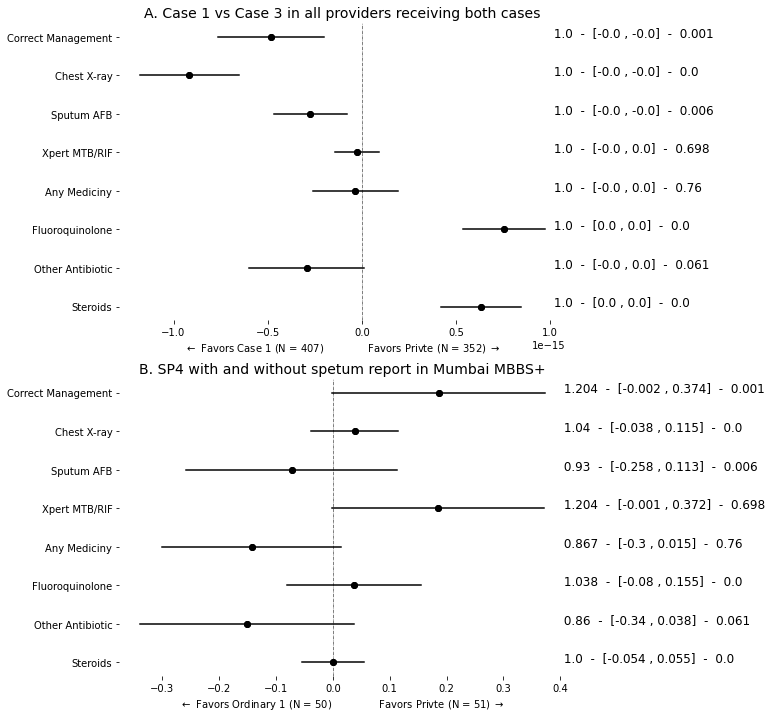

In [28]:
y_ticks_lbl = [
    "Correct Management"
    , "Chest X-ray"
    , "Sputum AFB"
    , "Xpert MTB/RIF"
    , "Any Mediciny"
    , "Fluoroquinolone"
    , "Other Antibiotic"
    , "Steroids"
][::-1]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 12))
# df21
for i in y[::-1]:
    ref_data = df211[df211["var"] == i]
    ax1.plot("range_val", "var", data = ref_data, color = "black")
    ax1.scatter("coef", "var", data = ref_data, color = "black")
# sns.lineplot("range_val", "var", data = df1, hue = "var", legend = False)
# df22
for i in y[::-1]:
    ref_data = df221[df221["var"] == i]
    ax2.plot("range_val", "var", data = ref_data, color = "black")
    ax2.scatter("coef", "var", data = ref_data, color = "black")
    
title_table = "Odds Ratio    95% CI P-value"

for i in range(8):
    lbl1 = table_reg_1.iloc[i]
    lbl2 = table_reg_2.iloc[i]
    
    ax1.text(1e-15, i, lbl1, size=12) ### Config value
    ax2.text(.4, i, lbl2, size=12) ### Config value
    
    
ax1.set_title("A. Case 1 vs Case 3 in all providers receiving both cases", size = 14)
ax2.set_title("B. SP4 with and without spetum report in Mumbai MBBS+", size = 14)

ax1.set_xlabel(r"$\leftarrow$ Favors Case 1 (N = 407)              Favors Privte (N = 352) $\rightarrow$")
ax2.set_xlabel(r"$\leftarrow$ Favors Ordinary 1 (N = 50)               Favors Privte (N = 51) $\rightarrow$")

ax1.spines[omit_all].set_visible(False)
ax2.spines[omit_all].set_visible(False)
    
ax1.set_yticklabels(y_ticks_lbl)
ax2.set_yticklabels(y_ticks_lbl)
ax1.axvline(0, linestyle = "-.", lw = .5, color = "black")
ax2.axvline(0, linestyle = "-.", lw = .5, color = "black")

## With Graded error bars

In [328]:
data3 = pd.read_stata("https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/ReplicationDataGhanaJDE_short.dta")
data3.head(3)

data30 = data3[(data3.wave >= 2) & (data3.cashtreat != 1)]

def f1(df, a, b):
    cond = (df.a == 3) & (df.b == 1)
    return cond


data30_she = data30.groupby('sheno')
data30['treatment'] = data30_she['wave'].transform(lambda x: x == 3 ) & data30_she['timetreat'].transform(lambda x: x == 1 )
data30['control'] = data30_she['control'].transform(lambda x: all(x))
data30['after'] = data30_she['wave'].transform(lambda x: np.where(x >=3, True, False))


data31 = data30[(data30['treatment'] == True) | (data30.control == True)]
data31.head(4)


C:\Users\Jhon\AppData\Local\Temp\ipykernel_2604\220912812.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data30['treatment'] = data30_she['wave'].transform(lambda x: x == 3 ) & data30_she['timetreat'].transform(lambda x: x == 1 )
C:\Users\Jhon\AppData\Local\Temp\ipykernel_2604\220912812.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data30['control'] = data30_she['control'].transform(lambda x: all(x))
C:\Users\Jhon\AppData\Local\Temp\ipykernel_2604\220912812.py:14: SettingWithCopyWarning: 
A val

,male_male,female_female,male_mixed,female_mixed,highcapture,highcapital,cashtreat,equiptreat,sheno,hourslastweek,...,timetreat,totalK,control,businesshome,akanspeaker,gaspeaker,everloan,fem,treatment,after
1,0,1,0,0,0,1,0,0,110101604,84.0,...,0,900.0,True,1,1,0,0,1,False,True
2,0,1,0,0,0,1,0,0,110101604,98.0,...,0,350.0,True,1,1,0,0,1,False,True
3,0,1,0,0,0,1,0,0,110101604,98.0,...,0,800.0,True,1,1,0,0,1,False,True
4,0,1,0,0,0,1,0,0,110101604,98.0,...,0,400.0,True,1,1,0,0,1,False,True


In [319]:
# lin_reg = smf.ols(formula, data=df).fit()
import statsmodels.formula.api as smf
# lin_reg.summary()

y = [ 
    "realfinalprofit", 
     "expend_health_3months", 
    "expend_education_3months", 
    "expend_total_3months"
]

fmla_x = " ~ equiptreat * after | wave + sheno | 0 | sheno"

l = [] # Lower
u = [] # Upper

line95 = []
line90 = []
c = [] # cofficiente
y_n = []

# y_name = []

id_m = 0

for i in y:
    
    while id_m < len(y):
        y_n.append([id_m + 1, id_m + 1])
        id_m = id_m + 1
        
        # print(id_m)
        
    
    pos = 3
    mld3 = smf.ols(i + fmla_x, data = data31).fit()
    
    coef = mld3.params.iloc[3]
    ci95 = mld3.conf_int().iloc[pos]
    ci90 = mld3.conf_int(alpha = .1).iloc[pos]
    
    line95.append([ci95[0], ci95[1]])
    line90.append([ci90[0], ci90[1]])
    c.append([coef, coef])
    

df3 = pd.DataFrame(
    {
        "y_n" : np.concatenate(y_n),
        "coef" : np.concatenate(c),
        "line95" : np.concatenate(line95),
        "line90" : np.concatenate(line90),
    }
)
df3

,y_n,coef,line95,line90
0,1,-7.464149,-23.687905,-21.077494
1,1,-7.464149,8.759608,6.149196
2,2,-3.352083,-15.680346,-13.696621
3,2,-3.352083,8.976179,6.992454
4,3,1.223990,-15.049897,-12.431298
5,3,1.223990,17.497878,14.879279
6,4,-1.503688,-24.524295,-20.820477
7,4,-1.503688,21.516919,17.813101


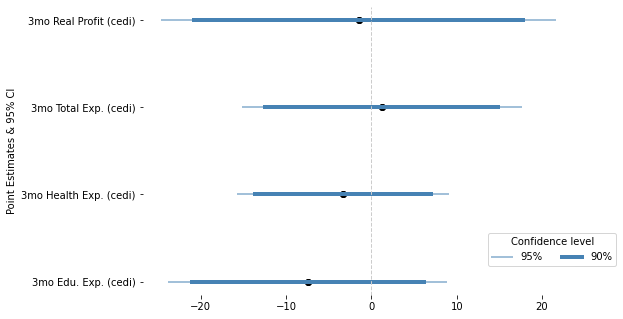

In [327]:
fig = plt.figure()
ax = fig.add_axes([.1, 1, 1, 1])
for i in range(1, 4):
    # print(ref_data)
    ref_data = df3[df3["y_n"] == i]
    ax.plot("line90", "y_n", data = ref_data, color = "steelblue", lw = 4, label = "")
    ax.plot("line95", "y_n", data = ref_data, color = "steelblue", alpha = .5, lw = 2, label = "")
    ax.scatter("coef", "y_n", data = ref_data, color = "black", label = "")
    
    
ref_data = df3[df3["y_n"] == 4]

ax.plot("line95", "y_n", data = ref_data, color = "steelblue", alpha = .5, label = "95%", lw = 2)    
ax.plot("line90", "y_n", data = ref_data, color = "steelblue", label = "90%", lw = 4)
ax.scatter("coef", "y_n", data = ref_data, color = "black", label = "") 


ax.legend(title = "Confidence level")
ax.axvline(0, linestyle = "--", lw = 1, color = "#cccccc")

ax.set_yticks(np.arange(1, 4.1, 1))
ax.set_yticklabels(["3mo Edu. Exp. (cedi)", "3mo Health Exp. (cedi)", "3mo Total Exp. (cedi)", "3mo Real Profit (cedi)"])
ax.set_ylabel("Point Estimates & 95% CI")

omit = ['top', 'right', 'left', 'bottom']
ax.spines[omit].set_visible(False) 
ax.legend(loc = (.8, .1), ncol = 4, title = "Confidence level")

## Marginal Effect

In [44]:
data4 = pd.read_stata("https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/RegCoefME.dta")
data4.head()

,study,facilitycode,case,as_correct,as_h1,as_h2,as_h6,as_h7,as_h8,as_h12,...,kenya_fac_qual_code_2,kenya_fac_qual_code_3,price_kenya,facility_private,checklist_essential,sp_roster_age,sp_roster_bmi,sp_roster_bp,sp_roster_bp_sys,sp_roster_male
0,Kenya,9052302,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,230.0,Private,0.500,31,32.038578,130/80,130,Female
1,Kenya,9012207,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,350.0,Private,0.625,31,32.038578,130/80,130,Female
2,Kenya,9052301,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,400.0,Private,0.125,31,32.038578,130/80,130,Female
3,Kenya,9022203,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,250.0,Private,0.125,31,32.038578,130/80,130,Female
4,Kenya,9012206,Child Diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,300.0,Private,0.125,31,32.038578,130/80,130,Female


In [153]:
y4 = [
   'as_correct', 'ch_correct', 'cp_correct', 'tb_correct', 
    # "refer"
    "med_any", "med_class_any_6", "med_class_any_16"]

for i in y4:
    label_encoder.fit(data4[i])
    data4[i] = label_encoder.transform(data4[i])
    
    data4[i] = np.where(data4[i] == 2, np.nan, data4[i])
    # print(set(data4[i]))

In [172]:

md1 = " ~ facility_private + C(case_code)"
md2 = " ~ facility_private"


ci95 = [] # CI
c = [] # cofficiente
y_n = [] # y posicion
y_name = [] # y label
y_label = []

id_m = 0 # axis 0

main_row = 2

correct_array = ['as_correct', 'ch_correct', 'cp_correct', 'tb_correct']

for i in y4:
    
    while id_m < len(y4): ## Y variables
        y_n.append([id_m + 1, id_m + 1, id_m + 1, id_m + 1])
        id_m = id_m + 1
    ### ols
    
    if i in correct_array:
        mdl_ols = smf.ols(i + md2, data = data4).fit()
    else:
        mdl_ols = smf.ols(i + md1, data = data4).fit()
        # print(i)
        # print(pd.DataFrame(mld_ols.summary().tables[1].data))
    
    coef_ols = np.float_(pd.DataFrame(mdl_ols.summary().tables[1].data).iloc[main_row, [1, 2]])
    
    point = coef_ols[0]
    std = coef_ols[1]
    
    y_label.append([i, i])
    y_name.append(["ols", "ols"])
    c.append([point, point])
    ci95.append([point + 1.96 * std, point - 1.96 * std])
    
    ### GLM
    if i in correct_array:
        mdl_glm = smf.logit(i + md2, data = data4).fit()
    else:
        mdl_glm = smf.logit(i + md2, data = data4).fit()
    
    coef_glm = np.float_(pd.DataFrame(mdl_glm.get_margeff().summary().tables[1].data).iloc[main_row - 1 , [1, 2]])
    
    point_glm = coef_glm[0]
    std_glm = coef_glm[1]
    
    y_label.append([i, i])
    y_name.append(["glm", "glm"])
    c.append([point_glm, point_glm])
    ci95.append([point_glm + 1.96 * std_glm, point_glm - 1.96 * std_glm])
len(np.concatenate(ci95)), len(np.concatenate(c)), len(np.concatenate(y_n)), len(np.concatenate(y_name)), len(np.concatenate(y_label))


Optimization terminated successfully.
         Current function value: 0.486007
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574092
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.308251
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.607698
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597636
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.692627
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.086124
         Iterations 9


(28, 28, 28, 28, 28)

C:\Users\Jhon\AppData\Local\Temp\ipykernel_4852\4080725713.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_data['y_pos'] = 8 - ref_data['y_pos'] + separate
C:\Users\Jhon\AppData\Local\Temp\ipykernel_4852\4080725713.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_data['y_pos'] = 8- ref_data['y_pos'] - separate
C:\Users\Jhon\AppData\Local\Temp\ipykernel_4852\4080725713.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

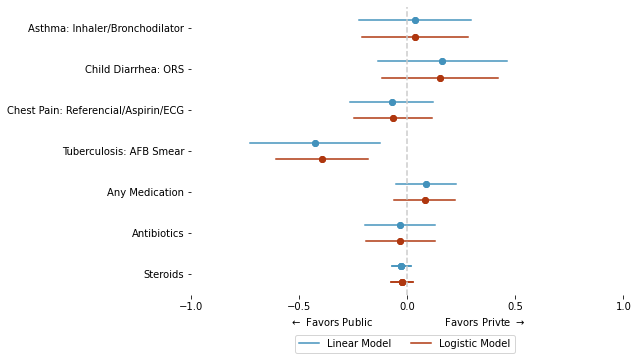

In [210]:
df41 = pd.DataFrame(
    {
        "modelo": np.concatenate(y_name), 
        "ylbel": np.concatenate(y_label),
        "y_pos": np.concatenate(y_n),
        "coef": np.concatenate(c), 
        "ci": np.concatenate(ci95)
    }
)
fig = plt.figure()
ax = fig.add_axes([.1, 1, 1, 1])

mdls = ['ols', 'glm']
y_val = np.unique(df41.y_pos)
separate = .2
colors = ['#4392bc', '#af370f']

for i in mdls:
    for j in y_val:
        ref_data = df41[(df41.y_pos == j) & (df41.modelo == i)]
        
        if i == "ols":
            ref_data['y_pos'] = 8 - ref_data['y_pos'] + separate 
            cl = colors[0]
        elif i == "glm":
            cl = colors[1]
            ref_data['y_pos'] = 8- ref_data['y_pos'] - separate 
            
        ax.plot("ci", "y_pos", data = ref_data, c = cl, label = "")
        ax.scatter("coef", "y_pos", data = ref_data, c = cl, label = "")
        # ax.text("coef", "y_pos", "ylbel", data = ref_data)

for i in mdls:
    ref_data = df41[(df41.y_pos == 7) & (df41.modelo == i)]
    if i == "ols":
        ref_data['y_pos'] = 8 - ref_data['y_pos'] + separate 
        cl = colors[0]
        lbl = "Linear Model"
    elif i == "glm":
        cl = colors[1]
        ref_data['y_pos'] = 8 - ref_data['y_pos'] - separate 
        lbl = "Logistic Model"
            
    ax.plot("ci", "y_pos", data = ref_data, c = cl, label = lbl)
    ax.scatter("coef", "y_pos", data = ref_data, c = cl, label = "")
            
y_label_t = [
    "Asthma: Inhaler/Bronchodilator"
    , "Child Diarrhea: ORS"
    , "Chest Pain: Referencial/Aspirin/ECG"
    , "Tuberculosis: AFB Smear"
    # , "Referred (non-diarrhea)"
    , "Any Medication"
    , "Antibiotics"
    , "Steroids"
]
omit = ['top', 'right', 'left', 'bottom']
ax.spines[omit].set_visible(False)      
ax.set_xlabel(r"$\leftarrow$ Favors Public                       Favors Privte $\rightarrow$")
ax.set_xlim(-1, 1)
ax.set_xticks(np.arange(-1, 1.1, .5))
ax.set_yticks(np.arange(1, 7.1, 1))
ax.set_yticklabels(y_label_t[::-1])
ax.legend(ncol = 2, loc = (.24, -.2))
ax.axvline(0, linestyle = "--", lw = 1.5, color = "#cccccc")

## Multiple Outcomes

In [329]:
data5 = pd.read_stata("https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/ReplicationDataGhanaJDE_short.dta")
data5.head()


data50 = data5[(data5.wave >= 2) & (data5.cashtreat != 1)]

def f1(df, a, b):
    cond = (df.a == 3) & (df.b == 1)
    return cond


data50_she = data50.groupby('sheno')
data50['treatment'] = data50_she['wave'].transform(lambda x: x == 3 ) & data50_she['timetreat'].transform(lambda x: x == 1 )
data50['control'] = data50_she['control'].transform(lambda x: all(x))
data50['after'] = data50_she['wave'].transform(lambda x: np.where(x >=3, True, False))


data51 = data50[(data50['treatment'] == True) | (data50.control == True)]
data51.head(4)


C:\Users\Jhon\AppData\Local\Temp\ipykernel_2604\2793920701.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data50['treatment'] = data50_she['wave'].transform(lambda x: x == 3 ) & data50_she['timetreat'].transform(lambda x: x == 1 )
C:\Users\Jhon\AppData\Local\Temp\ipykernel_2604\2793920701.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data50['control'] = data50_she['control'].transform(lambda x: all(x))
C:\Users\Jhon\AppData\Local\Temp\ipykernel_2604\2793920701.py:15: SettingWithCopyWarning: 
A 

,male_male,female_female,male_mixed,female_mixed,highcapture,highcapital,cashtreat,equiptreat,sheno,hourslastweek,...,timetreat,totalK,control,businesshome,akanspeaker,gaspeaker,everloan,fem,treatment,after
1,0,1,0,0,0,1,0,0,110101604,84.0,...,0,900.0,True,1,1,0,0,1,False,True
2,0,1,0,0,0,1,0,0,110101604,98.0,...,0,350.0,True,1,1,0,0,1,False,True
3,0,1,0,0,0,1,0,0,110101604,98.0,...,0,800.0,True,1,1,0,0,1,False,True
4,0,1,0,0,0,1,0,0,110101604,98.0,...,0,400.0,True,1,1,0,0,1,False,True


C:\Users\Jhon\AppData\Local\Temp\ipykernel_2604\2604888430.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_data['ypos1'] = ref_data.ypos - sep
C:\Users\Jhon\AppData\Local\Temp\ipykernel_2604\2604888430.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_data['ypos1'] = ref_data.ypos + sep
C:\Users\Jhon\AppData\Local\Temp\ipykernel_2604\2604888430.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

[Text(0, 1.0, '3mo Edu. Exp. (cedi)'),
 Text(0, 2.0, '3mo Health Exp. (cedi)'),
 Text(0, 3.0, '3mo Total Exp. (cedi)'),
 Text(0, 4.0, '3mo Real Profit (cedi)')]

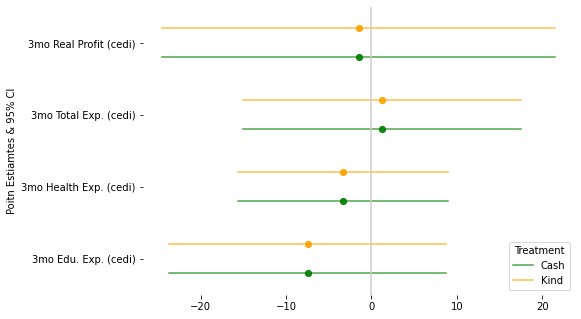

In [412]:
outcome_list = [
    "realfinalprofit", "expend_health_3months", 
    "expend_education_3months", "expend_total_3months"
]

flma5 = " ~ (cashtreat + equiptreat) * after | wave + sheno | 0 | sheno"

T = []
coef = []
std = []
y_pos = []

y_n = 1

for i in outcome_list:
    
    while y_n <= 4:
        y_pos.append(y_n)
        y_pos.append(y_n)
        y_n = y_n + 1
        
    
    mdl5 = smf.ols(i + flma5, data = data51).fit()
    mdl5_tbl = pd.DataFrame(mdl5.summary().tables[1].data)
    
    cash = np.float_(np.array(mdl5_tbl.iloc[5, [1, 2]]))
    
    coef.append(cash[0])
    std.append(cash[1])
    T.append("Cash")
    
    kind = np.float_(np.array(mdl5_tbl.iloc[6, [1, 2]]))
    
    coef.append(kind[0])
    std.append(kind[1])
    T.append("Kind")
    
y = [ 
"3mo Edu. Exp. (cedi)", 
 "3mo Health Exp. (cedi)", 
"3mo Total Exp. (cedi)", 
"3mo Real Profit (cedi)"
]

df5 = pd.DataFrame({
    "ypos" : y_pos
    , "treat": T
    , "coef": coef
    , "std": std
    }
)

df5['l'] = df5.coef - 1.96 * df5["std"]
df5['u'] = df5.coef + 1.96 * df5["std"]
    
    
df51 = pd.melt(df5, id_vars=['ypos', 'treat', "coef", "std"], var_name='lbl', value_name='ci')
    
fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])

sep = .2

for i in range(1, 4):
    for j in ['Cash', 'Kind']:
        ref_data = df51[(df51.treat == j) & (df51.ypos == i)]
        
        if j == 'Cash':
            ref_data['ypos1'] = ref_data.ypos - sep
            cl = "green"
        else:
            ref_data['ypos1'] = ref_data.ypos + sep
            cl = "orange"
        

        ax.plot("ci", "ypos1", data = ref_data, c = cl, alpha = .7, label = "")
        ax.scatter("coef", "ypos1", data = ref_data, c = cl, alpha = .7, label = "")

        
for j in ['Cash', 'Kind']:
    ref_data = df51[(df51.treat == j) & (df51.ypos == 4)]
    
    if j == 'Cash':
        ref_data['ypos1'] = ref_data.ypos - sep
        cl = "green"
    else:
        ref_data['ypos1'] = ref_data.ypos + sep
        cl = "orange"
        
    ax.plot(ref_data["ci"], ref_data["ypos1"], c = cl, alpha = .7, label = j) 
    ax.scatter("coef", "ypos1", data = ref_data, c = cl, alpha = .7, label = "")
    
ax.legend(title = "Treatment")
ax.set_ylabel("Poitn Estiamtes & 95% CI")
ax.spines[omit_all].set_visible(False)
ax.axvline(0, color = "#ccc")    
ax.set_ylim(.5, 4.5)
ax.set_yticks(np.arange(1, 4.1, 1))
ax.set_yticklabels(y)


,0,1,2,3,4,5,6
0,,coef,std err,t,P>|t|,[0.025,0.975]
1,Intercept,58.8885,5.791,10.169,0.000,47.532,70.245
2,after | wave[T.True],58.8885,5.791,10.169,0.000,47.532,70.245
3,cashtreat,-6.277e-17,1.73e-16,-0.363,0.717,-4.02e-16,2.76e-16
4,cashtreat:after | wave[T.True],0,0,nan,nan,0,0
5,equiptreat,-1.5037,11.738,-0.128,0.898,-24.524,21.517
6,equiptreat:after | wave[T.True],-1.5037,11.738,-0.128,0.898,-24.524,21.517
7,sheno | 0 | sheno,1.145e-07,5.64e-08,2.029,0.043,3.84e-09,2.25e-07


## Point Estimates by Rounds

In [439]:
data6 = pd.read_stata("https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/ReplicationDataGhanaJDE_short.dta")
data6.head()


data60 = data6[(data6.wave >= 2)]

def f1(df, a, b):
    cond = (df.a == 3) & (df.b == 1)
    return cond


data60_she = data60.groupby('sheno')
data60['treatment'] = data60_she['wave'].transform(lambda x: x == 3 ) & data60_she['timetreat'].transform(lambda x: x == 1 )
data60['control'] = data60_she['control'].transform(lambda x: all(x))
data60['after'] = data60_she['wave'].transform(lambda x: np.where(x >=3, True, False))


data61 = data60[(data60['treatment'] == True) | (data60.control == True)]
data61["wavec"] = data61['wave'].astype('category')
data61.head(4)


C:\Users\Jhon\AppData\Local\Temp\ipykernel_2604\2809122751.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data60['treatment'] = data60_she['wave'].transform(lambda x: x == 3 ) & data60_she['timetreat'].transform(lambda x: x == 1 )
C:\Users\Jhon\AppData\Local\Temp\ipykernel_2604\2809122751.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data60['control'] = data60_she['control'].transform(lambda x: all(x))
C:\Users\Jhon\AppData\Local\Temp\ipykernel_2604\2809122751.py:15: SettingWithCopyWarning: 
A 

,male_male,female_female,male_mixed,female_mixed,highcapture,highcapital,cashtreat,equiptreat,sheno,hourslastweek,...,totalK,control,businesshome,akanspeaker,gaspeaker,everloan,fem,treatment,after,wavec
1,0,1,0,0,0,1,0,0,110101604,84.0,...,900.0,True,1,1,0,0,1,False,True,5
2,0,1,0,0,0,1,0,0,110101604,98.0,...,350.0,True,1,1,0,0,1,False,True,3
3,0,1,0,0,0,1,0,0,110101604,98.0,...,800.0,True,1,1,0,0,1,False,True,6
4,0,1,0,0,0,1,0,0,110101604,98.0,...,400.0,True,1,1,0,0,1,False,True,4


In [441]:
data61.wavec

1       5
2       3
3       6
4       4
5       2
       ..
4753    5
4754    6
4755    4
4756    3
4757    2
Name: wavec, Length: 2183, dtype: category
Categories (5, int64): [2, 3, 4, 5, 6]

In [471]:

mdl6 = smf.ols("realfinalprofit ~ (cashtreat + equiptreat) : C(wave)", data = data61).fit()
mdl6.summary().tables[1].data


c:\python38\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


[['', 'coef', 'std err', 't', 'P>|t|', '[0.025', '0.975]'],
 ['Intercept',
  '  109.6432',
  '    3.762',
  '   29.147',
  ' 0.000',
  '  102.266',
  '  117.021'],
 ['cashtreat:C(wave)[2]',
  ' 4.993e-15',
  ' 3.64e-15',
  '    1.372',
  ' 0.170',
  '-2.15e-15',
  ' 1.21e-14'],
 ['cashtreat:C(wave)[3]',
  '   17.4493',
  '   16.823',
  '    1.037',
  ' 0.300',
  '  -15.543',
  '   50.442'],
 ['cashtreat:C(wave)[4]',
  '         0',
  '        0',
  '      nan',
  '   nan',
  '        0',
  '        0'],
 ['cashtreat:C(wave)[5]',
  '         0',
  '        0',
  '      nan',
  '   nan',
  '        0',
  '        0'],
 ['cashtreat:C(wave)[6]',
  '         0',
  '        0',
  '      nan',
  '   nan',
  '        0',
  '        0'],
 ['equiptreat:C(wave)[2]',
  '         0',
  '        0',
  '      nan',
  '   nan',
  '        0',
  '        0'],
 ['equiptreat:C(wave)[3]',
  '  -14.3545',
  '   16.823',
  '   -0.853',
  ' 0.394',
  '  -47.347',
  '   18.638'],
 ['equiptreat:C(wave)[4]',
  

In [467]:
fml6 = "realfinalprofit ~ (cashtreat + equiptreat) * C(wave)|wave"
# import patsy

# y, x = patsy.dmatrices(fml6, data61, return_type = 'dataframe')
# x